In [1]:
from google.cloud import bigquery
import google.datalab.bigquery as bq
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [2]:
client = bigquery.Client()

In [3]:
%bq --help

usage: %bq [-h]
           {datasets,tables,query,execute,extract,sample,dryrun,udf,datasource,load,pipeline}
           ...

Execute various BigQuery-related operations. Use "%bq <command> -h" for help
on a specific command.

positional arguments:
  {datasets,tables,query,execute,extract,sample,dryrun,udf,datasource,load,pipeline}
                        commands
    datasets            Operations on BigQuery datasets
    tables              Operations on BigQuery tables
    query               Create or execute a BigQuery SQL query object,
                        optionally using other SQL objects, UDFs, or external
                        datasources. If a query name is not specified, the
                        query is executed.
    execute             Execute a BigQuery SQL query and optionally send the
                        results to a named table. The cell can optionally
                        contain arguments for expanding variables in the
                        query.
 

In [4]:
%%bq datasets list

In [5]:
%%bq tables list

In [6]:
%%bq sample --table csc672-capstone.csc672_project.csc672_table --count 5

f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
1.6828648101258654,3.2636406358678913,8.798138854104952,2.6562532344147094,3.5067331320159765,10.161280650613378,-3.841196925412869,-0.16668935847080157,-14.86894027666786,16.369012362120863,-1.8608999471198722,4.157648047401516,1,0,1,1
-0.5906569742437648,3.2636406358678913,8.282873156645643,3.735870942448979,3.5067331320159765,10.161280650613378,-3.1507304673673318,-0.16668935847080157,-19.645392733042588,22.50325961025505,-1.8608999471198722,4.157648047401516,1,0,1,1
-1.5989583630139892,3.2636406358678913,9.247400350673683,3.735870942448979,3.5067331320159765,10.161280650613378,-2.1987362620248048,-0.16668935847080157,-9.595688507768756,9.850093453658753,-1.8608999471198722,4.157648047401516,1,0,0,0
-0.48010428589160226,3.2636406358678913,8.877910966140767,3.735870942448979,3.5067331320159765,10.161280650613378,-0.5409460728288016,-0.16668935847080157,-8.286829049942531,9.850093453658753,-1.8608999471198722,4.157648047401516,1,0,0,0
1.837734252040243,3.2636406358678913,8.369801187601919,2.439818553924934,3.5067331320159765,10.84058628403527,-3.4185729088116554,-2.9223161361974395,-25.044786895136827,22.259334675259844,-1.8608999471198722,4.157648047401516,1,0,1,1


In [7]:
%%bq query
SELECT * FROM `csc672-capstone.csc672_project.csc672_table`
LIMIT 100

f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
1.6828648101258654,3.2636406358678913,8.798138854104952,2.6562532344147094,3.5067331320159765,10.161280650613378,-3.841196925412869,-0.16668935847080157,-14.86894027666786,16.369012362120863,-1.8608999471198722,4.157648047401516,1,0,1,1
-0.5906569742437648,3.2636406358678913,8.282873156645643,3.735870942448979,3.5067331320159765,10.161280650613378,-3.1507304673673318,-0.16668935847080157,-19.645392733042588,22.50325961025505,-1.8608999471198722,4.157648047401516,1,0,1,1
-1.5989583630139892,3.2636406358678913,9.247400350673683,3.735870942448979,3.5067331320159765,10.161280650613378,-2.1987362620248048,-0.16668935847080157,-9.595688507768756,9.850093453658753,-1.8608999471198722,4.157648047401516,1,0,0,0
-0.48010428589160226,3.2636406358678913,8.877910966140767,3.735870942448979,3.5067331320159765,10.161280650613378,-0.5409460728288016,-0.16668935847080157,-8.286829049942531,9.850093453658753,-1.8608999471198722,4.157648047401516,1,0,0,0
1.837734252040243,3.2636406358678913,8.369801187601919,2.439818553924934,3.5067331320159765,10.84058628403527,-3.4185729088116554,-2.9223161361974395,-25.044786895136827,22.259334675259844,-1.8608999471198722,4.157648047401516,1,0,1,1
-0.3758588677336472,3.2636406358678913,8.283561615624627,3.735870942448979,3.5067331320159765,10.161280650613378,-0.47260508900449594,-0.16668935847080157,-11.79101874873326,14.1458774218762,-1.8608999471198722,4.157648047401516,1,0,0,0
1.4507340255249555,3.2636406358678913,8.453679254494215,2.289570631927207,3.5067331320159765,10.161280650613378,-2.5941040937003637,-0.16668935847080157,-12.645603936733082,15.995970875534955,-1.8608999471198722,4.157648047401516,1,0,0,0
1.9655353894369871,3.2636406358678913,8.439873372505721,3.2076128273469378,3.5067331320159765,10.161280650613378,-1.0447546242560657,-0.16668935847080157,-15.726883930107046,20.09805490886592,-1.8608999471198722,4.157648047401516,1,0,0,0
1.9391566277823302,3.417860521516889,8.758346798607109,2.083112988827354,4.176597895838163,10.84058628403527,-4.39385189167546,-2.247034717120109,-7.822696366521294,14.846159298191674,-6.982397875566875,4.315296094803031,0,0,0,0
1.6339361863191872,3.2636406358678913,9.00279090085935,2.6344725817595824,3.5067331320159765,12.260126950389722,-3.6769679464655853,-2.799366403793793,-13.607554517258524,9.850093453658753,-1.8608999471198722,4.157648047401516,1,0,0,0


Looking at the frequency counts of all the different boolean variables within our dataset

In [8]:
%%bq query
SELECT treatment, COUNT(*)
FROM `csc672-capstone.csc672_project.csc672_table`
GROUP BY treatment;

treatment,f0_
1,21408827
0,3900655


In [9]:
%%bq query
SELECT conversion, count(*)
FROM `csc672-capstone.csc672_project.csc672_table`
GROUP BY conversion;

conversion,f0_
0,25251421
1,58061


In [10]:
%%bq query
SELECT visit, count(*)
FROM `csc672-capstone.csc672_project.csc672_table`
GROUP BY visit;

visit,f0_
1,1045828
0,24263654


In [11]:
%%bq query
SELECT exposure, count(*)
FROM `csc672-capstone.csc672_project.csc672_table`
GROUP BY exposure;

exposure,f0_
1,884297
0,24425185


Looking at some Crosstabs of the different boolean variables

In [12]:
%%bq query
SELECT treatment, conversion, count(*) AS user_count
FROM `csc672_project.csc672_table`
GROUP BY 1, 2

treatment,conversion,user_count
1,1,51258
1,0,21357569
0,0,3893852
0,1,6803


In [13]:
%%bq query
SELECT treatment, visit, count(*) AS user_count
FROM `csc672_project.csc672_table`
GROUP BY 1, 2

treatment,visit,user_count
1,1,943892
1,0,20464935
0,0,3798719
0,1,101936


In [14]:
%%bq query -n numeric_data
SELECT f0, f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11
FROM `csc672-capstone.csc672_project.csc672_table`

In [15]:
%%bq sample --count 10 --query numeric_data

f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11
0.49689175000807984,3.2636406358678913,8.640265518456221,3.2076128273469378,3.5067331320159765,10.161280650613378,-0.6687715480833409,-0.16668935847080157,-16.279477567603116,19.451753895680095,-1.8608999471198722,4.157648047401516
1.5889203377293084,3.2636406358678913,8.997619883634734,2.744096045292436,3.5067331320159765,10.161280650613378,-0.8418026278178221,-0.16668935847080157,-8.500870483304695,9.850093453658753,-1.8608999471198722,4.157648047401516
-1.840606681691722,3.2636406358678913,9.307920124114252,3.735870942448979,3.5067331320159765,10.161280650613378,-1.1804571490878937,-0.16668935847080157,-8.061212316278258,9.850093453658753,-1.8608999471198722,4.157648047401516
1.082004100225565,3.2636406358678913,8.306377581376651,3.386711320596164,3.5067331320159765,10.161280650613378,-2.626751353397113,-0.16668935847080157,-16.936572327309843,18.494516991549474,-1.8608999471198722,4.157648047401516
0.531310303798294,3.2636406358678913,8.736527594576255,3.258495990225706,3.5067331320159765,10.161280650613378,-3.7004735075497104,-0.16668935847080157,-23.523486884733195,21.708065666546858,-1.8608999471198722,4.157648047401516
0.02537121771352213,3.2636406358678913,8.444052315217215,3.317236290879791,4.176597895838163,10.161280650613378,-1.5254520609788784,-0.16668935847080157,-16.469187193931933,15.562188244670658,-10.889864650344782,4.157648047401516
-0.7142648881379072,3.2636406358678913,8.94195024765036,3.735870942448979,3.5067331320159765,10.161280650613378,-0.47260508900449594,-0.16668935847080157,-9.753174861364467,9.850093453658753,-1.8608999471198722,4.157648047401516
1.2038160590332825,3.2636406358678913,8.716676616584964,2.4093176653191923,3.5067331320159765,10.84058628403527,-3.1842467399415213,-3.5810558559026315,-15.174943838905673,17.4896529316129,-1.8608999471198722,4.157648047401516
-0.3145586930924935,3.2636406358678913,9.212596746047934,3.735870942448979,3.5067331320159765,10.84058628403527,-5.350240376821665,-4.533445606477807,-14.823334433838745,9.850093453658753,-1.8608999471198722,4.157648047401516
1.0597443625699718,3.2636406358678913,8.67218565801374,2.7168660581561843,3.5067331320159765,10.84058628403527,-2.0865392982771027,-4.241493596588902,-10.051365477895152,16.79698624063645,-1.8608999471198722,4.157648047401516


Performing some preliminary data analysis on the numeric datasets within our table. I took a 2% random sample of our dataset, resulting in 506,556 rows, in order to speed up proccessing time to allow me to perform exploratory analysis. The number of rows in the sample should suffice for the exploratory analysis to be an accurate representation of our data.

In [16]:
sampling = bq.Sampling.random(percent=2)
job = numeric_data.execute(sampling=sampling)
job.result()

f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11
-1.3316986617569375,3.2636406358678913,9.170906533449195,3.735870942448979,3.5067331320159765,10.84058628403527,-0.7287417615303902,-4.01349764518446,-10.051365477895152,9.850093453658753,-1.8608999471198722,4.157648047401516
0.6871883818511488,3.2636406358678913,8.63724312321873,2.549442017457788,3.5067331320159765,10.161280650613378,-1.5922392993104104,-0.16668935847080157,-10.051365477895152,16.987718837084152,-1.8608999471198722,4.157648047401516
0.6057255243048503,3.2636406358678913,8.391002725533681,2.9943669326746853,3.5067331320159765,10.161280650613378,-1.8600817407547332,-0.16668935847080157,-17.783986714089526,20.95065417561127,-1.8608999471198722,4.157648047401516
-1.631115616896576,3.2636406358678913,9.326443518948686,3.735870942448979,3.5067331320159765,10.161280650613378,-1.1804571490878937,-0.16668935847080157,-8.898589673364645,9.850093453658753,-1.8608999471198722,4.157648047401516
1.2115015742594444,3.2636406358678913,8.347448972543292,2.7734226411923277,3.5067331320159765,10.161280650613378,-0.9965842029747138,-0.16668935847080157,-26.169344229690147,26.18003302839724,-1.8608999471198722,4.157648047401516
0.36753787780438474,3.2636406358678913,8.754441318857644,3.317236290879791,3.8031530121183064,10.161280650613378,-0.9965842029747138,-0.16668935847080157,-19.4229834500229,20.49717314795396,-10.82248369023862,4.157648047401516
1.0682631253759767,3.2636406358678913,8.422080299244103,3.317236290879791,4.309886144134283,10.84058628403527,-2.9186117613114604,-3.74135121948217,-18.272975733874603,15.228112715096266,-10.671951329759258,4.157648047401516
-1.184949126274935,3.2636406358678913,9.15584493780744,3.735870942448979,3.5067331320159765,10.161280650613378,-2.6105184122473206,-0.16668935847080157,-13.354574452211693,9.850093453658753,-1.8608999471198722,4.157648047401516
1.110960520868254,3.5272812717357827,8.760493870747602,2.392124176863689,3.5067331320159765,11.322561301226756,-2.1987362620248048,-2.256292425050392,-7.569716301474461,15.40037381463501,-1.8608999471198722,4.157648047401516
-1.029735942246604,3.2636406358678913,8.387216687980294,3.735870942448979,3.5067331320159765,10.161280650613378,-0.47260508900449594,-0.16668935847080157,-14.388768266325375,13.19386896339545,-1.8608999471198722,4.157648047401516


In [17]:
numeric_df = numeric_data.execute(sampling=sampling, output_options=bq.QueryOutput.dataframe()).result()
len(numeric_df)

506906

In [18]:
numeric_df.head(5)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11
0,-0.452142,3.263641,8.325629,3.735871,3.506733,10.161281,-0.472605,-0.166689,-19.759335,16.894056,-1.8609,4.157648
1,-0.079943,3.263641,8.790162,2.943484,3.506733,10.161281,-0.786360,-0.166689,-15.216883,15.714751,-1.8609,4.157648
2,1.969831,3.263641,8.387524,2.049749,3.506733,10.840586,-5.416971,-3.999254,-10.051365,14.632516,-1.8609,4.157648
3,-0.787632,3.263641,8.693859,3.735871,3.506733,10.161281,-1.343855,-0.166689,-14.180080,16.696253,-1.8609,4.157648
4,-0.806724,3.263641,8.865117,3.735871,3.506733,10.840586,-3.427960,-4.522730,-13.354574,9.850093,-1.8609,4.157648


In [19]:
numeric_df.dtypes

f0     float64
f1     float64
f2     float64
f3     float64
f4     float64
f5     float64
f6     float64
f7     float64
f8     float64
f9     float64
f10    float64
f11    float64
dtype: object

In [20]:
numeric_df.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11
count,506906.000000,506906.000000,506906.000000,506906.000000,506906.000000,506906.000000,506906.000000,506906.000000,506906.000000,506906.000000,506906.000000,506906.000000
mean,0.619998,3.265638,8.506974,3.656447,3.522614,10.201446,1.759337,-0.292615,-2.045798,10.669613,-2.092351,4.159110
std,1.534957,0.022793,0.359208,0.241797,0.109431,0.231814,1.670803,0.662623,5.464143,2.292670,1.383157,0.017082
min,-1.946270,3.263641,8.272483,1.586655,3.506733,10.161281,-8.002128,-4.724849,-32.375222,9.850093,-13.037909,4.157648
25%,-1.004473,3.263641,8.272483,3.735871,3.506733,10.161281,0.945163,-0.166689,-2.716012,9.850093,-1.860900,4.157648
50%,1.633979,3.263641,8.272483,3.735871,3.506733,10.161281,2.386066,-0.166689,1.107571,9.850093,-1.860900,4.157648
75%,1.991981,3.263641,8.756688,3.735871,3.506733,10.161281,2.981721,-0.166689,1.107571,9.850093,-1.860900,4.157648
max,1.991981,4.280761,9.337055,3.735871,7.259164,17.128965,2.981721,-0.166689,1.107571,28.349724,-1.860900,4.999465


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
plt.rcParams['figure.figsize'] = [15, 5]

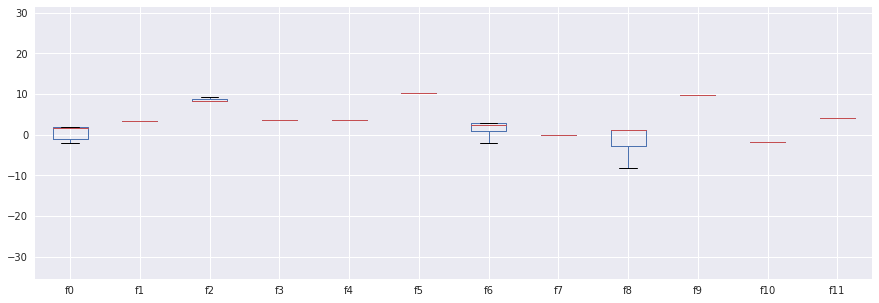

In [24]:
numeric_df.boxplot(column=['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11'])

(array([ 60031.,  49825.,  43130.,  34185.,  14356.,  10193.,  11015.,
         11182.,  17187., 255802.]),
 array([-1.94627032, -1.55244523, -1.15862014, -0.76479504, -0.37096995,
         0.02285515,  0.41668024,  0.81050534,  1.20433043,  1.59815553,
         1.99198062]),
 <a list of 10 Patch objects>)

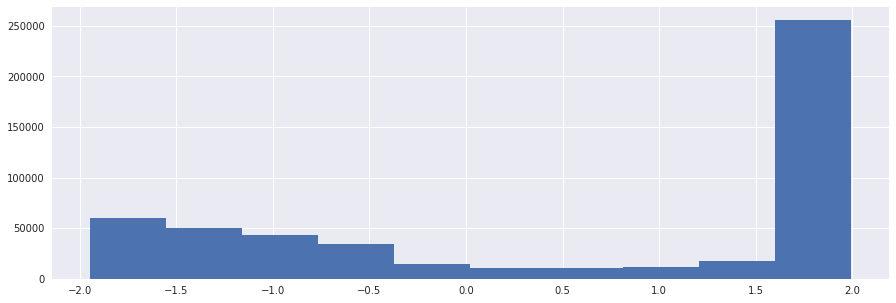

In [25]:
plt.hist(numeric_df["f0"])

(array([5.01024e+05, 3.51900e+03, 7.51000e+02, 3.66000e+02, 1.27000e+02,
        4.90000e+01, 2.90000e+01, 1.10000e+01, 2.00000e+00, 2.00000e+00]),
 array([3.26364064, 3.37662125, 3.48960187, 3.60258249, 3.7155631 ,
        3.82854372, 3.94152434, 4.05450495, 4.16748557, 4.28046619,
        4.3934468 ]),
 <a list of 10 Patch objects>)

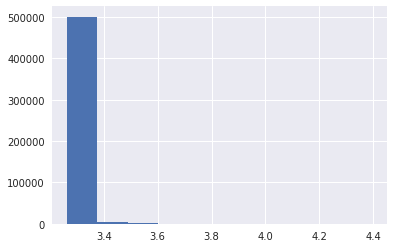

In [41]:
plt.hist(numeric_df["f1"])

In [30]:
%%bq query
SELECT count(*) 
FROM `csc672-capstone.csc672_project.csc672_table`
WHERE f1 > 3.263641

f0_
244554


For feature f1, only 244,554 of the users had a value greater than 3.26 - representing .97% of all users

(array([328906.,  16000.,  12714.,  13698.,  15253.,  18487.,  17317.,
         22764.,  27454.,  33287.]),
 array([8.2724831 , 8.37894005, 8.48539699, 8.59185394, 8.69831089,
        8.80476784, 8.91122479, 9.01768174, 9.12413868, 9.23059563,
        9.33705258]),
 <a list of 10 Patch objects>)

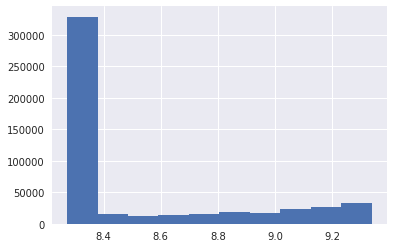

In [62]:
plt.hist(numeric_df["f2"])

(array([1.00000e+01, 2.46000e+02, 8.61000e+02, 2.18300e+03, 4.42600e+03,
        6.57400e+03, 9.45300e+03, 1.30570e+04, 1.96550e+04, 4.49415e+05]),
 array([1.53959833, 1.75922559, 1.97885285, 2.19848011, 2.41810737,
        2.63773463, 2.8573619 , 3.07698916, 3.29661642, 3.51624368,
        3.73587094]),
 <a list of 10 Patch objects>)

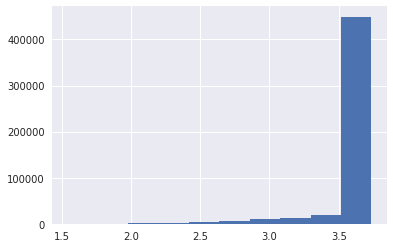

In [64]:
plt.hist(numeric_df["f3"])

(array([4.99605e+05, 3.68900e+03, 1.50800e+03, 5.55000e+02, 2.98000e+02,
        1.31000e+02, 5.50000e+01, 2.90000e+01, 8.00000e+00, 2.00000e+00]),
 array([3.50673313, 3.87660819, 4.24648324, 4.61635829, 4.98623335,
        5.3561084 , 5.72598346, 6.09585851, 6.46573356, 6.83560862,
        7.20548367]),
 <a list of 10 Patch objects>)

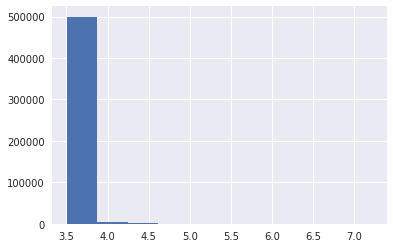

In [43]:
plt.hist(numeric_df["f4"])

In [49]:
%%bq query
SELECT count(*) 
FROM `csc672-capstone.csc672_project.csc672_table`
WHERE f4 > 3.506734

f0_
802806


3% of users for f4 were greater than 3.51

(array([5.00000e+00, 1.91000e+02, 1.19400e+03, 4.14400e+03, 1.01280e+04,
        2.09060e+04, 3.24970e+04, 5.12850e+04, 5.86650e+04, 3.26865e+05]),
 array([-7.84193094, -6.75956576, -5.67720058, -4.59483539, -3.51247021,
        -2.43010503, -1.34773985, -0.26537466,  0.81699052,  1.8993557 ,
         2.98172089]),
 <a list of 10 Patch objects>)

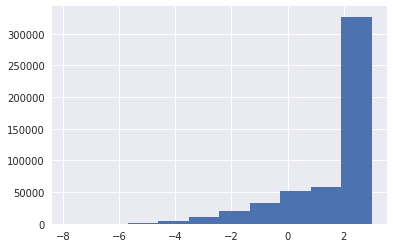

In [52]:
plt.hist(numeric_df["f6"])

(array([  5170.,   4137.,   3329.,   2023.,   1440.,   1025.,    918.,
           835.,    837., 486166.]),
 array([-4.72483886, -4.26902391, -3.81320896, -3.35739401, -2.90157906,
        -2.44576411, -1.98994916, -1.53413421, -1.07831926, -0.62250431,
        -0.16668936]),
 <a list of 10 Patch objects>)

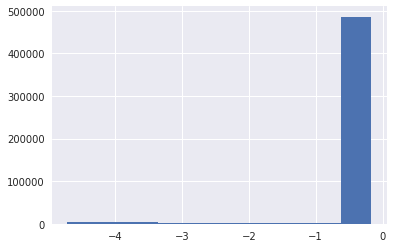

In [54]:
plt.hist(numeric_df["f7"])

(array([4.30000e+01, 4.86000e+02, 2.21900e+03, 6.32000e+03, 1.18800e+04,
        1.79490e+04, 2.51420e+04, 2.95300e+04, 4.79730e+04, 3.64338e+05]),
 array([-32.68846794, -29.30886406, -25.92926017, -22.54965628,
        -19.1700524 , -15.79044851, -12.41084462,  -9.03124074,
         -5.65163685,  -2.27203296,   1.10757092]),
 <a list of 10 Patch objects>)

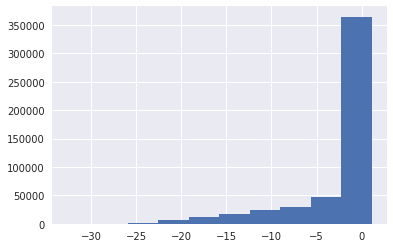

In [56]:
plt.hist(numeric_df["f8"])

(array([4.45369e+05, 1.54820e+04, 1.33360e+04, 1.17390e+04, 9.29600e+03,
        6.18700e+03, 3.06900e+03, 1.11000e+03, 2.63000e+02, 2.90000e+01]),
 array([ 9.85009345, 11.70496601, 13.55983856, 15.41471111, 17.26958367,
        19.12445622, 20.97932878, 22.83420133, 24.68907388, 26.54394644,
        28.39881899]),
 <a list of 10 Patch objects>)

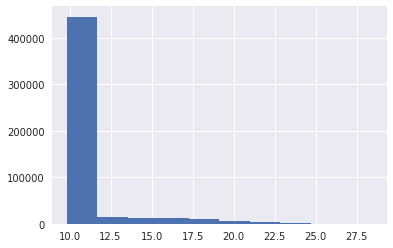

In [58]:
plt.hist(numeric_df["f9"])

(array([  3249.,   2981.,   2177.,   1729.,   1603.,   1325.,   1008.,
           857.,    735., 490216.]),
 array([-13.03786921, -11.92017228, -10.80247536,  -9.68477843,
         -8.5670815 ,  -7.44938458,  -6.33168765,  -5.21399073,
         -4.0962938 ,  -2.97859687,  -1.86089995]),
 <a list of 10 Patch objects>)

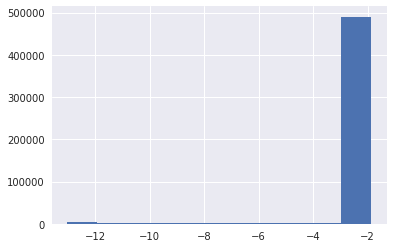

In [60]:
plt.hist(numeric_df["f10"])

(array([5.00579e+05, 4.37100e+03, 4.72000e+02, 2.32000e+02, 1.04000e+02,
        6.60000e+01, 3.50000e+01, 1.10000e+01, 9.00000e+00, 1.00000e+00]),
 array([4.15764805, 4.24345499, 4.32926193, 4.41506887, 4.50087581,
        4.58668275, 4.6724897 , 4.75829664, 4.84410358, 4.92991052,
        5.01571746]),
 <a list of 10 Patch objects>)

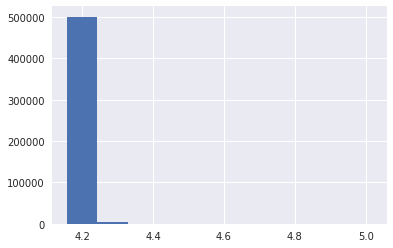

In [61]:
plt.hist(numeric_df["f11"])

None of the numeric variables we're working with are close to a normal distribution. Nearly all of them are very imbalanced. We'll have to figure out how to work with these variables for predictive power.

In [27]:
cor_mat = numeric_df.corr()

In [28]:
from string import ascii_letters

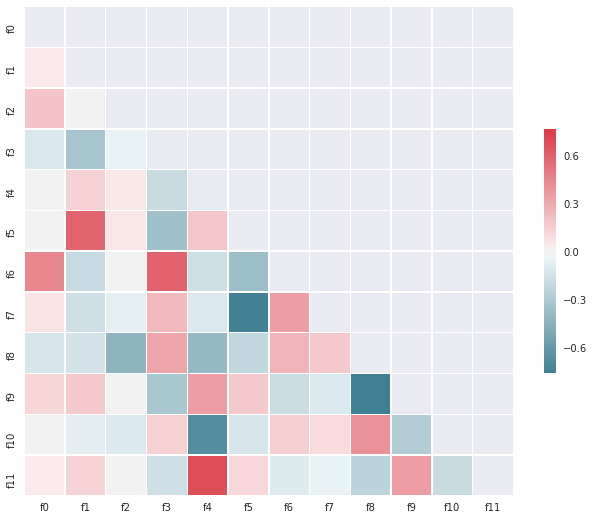

In [29]:
# Generate a mask for the upper triangle
mask = np.zeros_like(cor_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor_mat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [30]:
%%bq query -n all_data
SELECT * FROM `csc672-capstone.csc672_project.csc672_table`

In [31]:
sampling = bq.Sampling.random(percent=2)
job = all_data.execute(sampling=sampling)
job.result()

f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
-0.13001292030624167,3.2636406358678913,8.991395723457885,3.581365348430812,3.5067331320159765,10.161280650613378,-2.8919007304273556,-0.16668935847080157,-7.569716301474461,9.850093453658753,-1.8608999471198722,4.157648047401516,1,0,0,0
0.9234069055718299,3.2636406358678913,9.177755680974554,3.4717418848979587,3.5067331320159765,10.84058628403527,-2.014863315911625,-4.537563830141341,-14.68344782410188,9.850093453658753,-1.8608999471198722,4.157648047401516,1,0,1,0
-1.7978858647912466,3.2636406358678913,9.307298645694958,3.735870942448979,3.5067331320159765,10.84058628403527,-0.47260508900449594,-4.598433632003905,-13.354574452211693,9.850093453658753,-1.8608999471198722,4.157648047401516,1,0,0,0
-0.994869064306966,3.2636406358678913,8.866681496191315,3.735870942448979,3.5067331320159765,10.161280650613378,-1.9135082185426224,-0.16668935847080157,-8.061212316278258,9.850093453658753,-1.8608999471198722,4.157648047401516,1,0,0,0
1.7470665131990715,3.2636406358678913,8.437261046910157,3.162730696861624,3.5067331320159765,10.161280650613378,-2.1324513544304198,-0.16668935847080157,-22.05624086985978,12.295783968217448,-1.8608999471198722,4.157648047401516,1,0,0,0
-0.4561840666240733,3.2636406358678913,9.139244641231855,3.735870942448979,3.5067331320159765,10.161280650613378,-2.1096746776214665,-0.16668935847080157,-14.538708699088758,9.850093453658753,-1.8608999471198722,4.157648047401516,1,0,0,0
-1.058242182428379,3.2636406358678913,8.604209903986366,3.735870942448979,4.309886144134283,10.161280650613378,-2.063033737192977,-0.16668935847080157,-15.5380330121017,11.700186907317505,-11.480101826044368,4.157648047401516,1,0,1,0
-1.0536524378379095,3.2636406358678913,9.129281055353443,3.735870942448979,3.8031530121183064,10.161280650613378,-1.0913955646845555,-0.16668935847080157,-12.797362227544454,9.850093453658753,-10.866055861206366,4.157648047401516,1,0,0,0
0.2101814138488236,3.417860521516889,8.759533521762386,2.6240319921804325,3.5067331320159765,10.84058628403527,-3.5534442787548493,-2.2522032971962447,-14.538708699088758,12.78242220053757,-1.8608999471198722,4.157648047401516,0,0,0,0
1.638925291847586,3.2636406358678913,8.400611118094783,2.7584772871720076,3.5067331320159765,10.161280650613378,-1.0913955646845555,-0.16668935847080157,-10.590552218450851,13.19386896339545,-1.8608999471198722,4.157648047401516,1,0,1,1


In [32]:
all_df = all_data.execute(sampling=sampling, output_options=bq.QueryOutput.dataframe()).result()
len(all_df)

505976

In [33]:
all_df.dtypes

f0            float64
f1            float64
f2            float64
f3            float64
f4            float64
f5            float64
f6            float64
f7            float64
f8            float64
f9            float64
f10           float64
f11           float64
treatment       int64
conversion      int64
visit           int64
exposure        int64
dtype: object

In [34]:
all_df["treatment"] = all_df["treatment"].astype("bool")

In [35]:
all_df["exposure"] = all_df["exposure"].astype("bool")

In [36]:
all_df["visit"] = all_df["visit"].astype("bool")

In [37]:
all_df["conversion"] = all_df["conversion"].astype("bool")

Try a Scatter Plot with labels

For correlated features, I think it would be valuable to look at how the boolean variables look across the different scatter plot relationships and see if there is a pattern for positive or negative labels of the target variables based on their relationship in the scatter

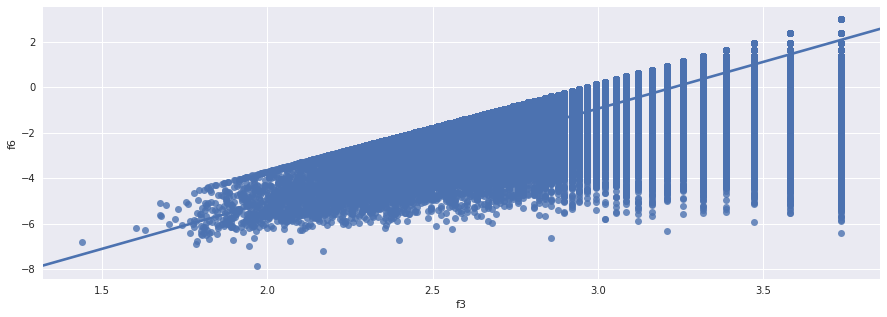

In [42]:
sns.regplot(x=all_df["f3"], y=all_df["f6"])

Text(0.5,1,'Scatter of f3 and f6 with visit class labels')

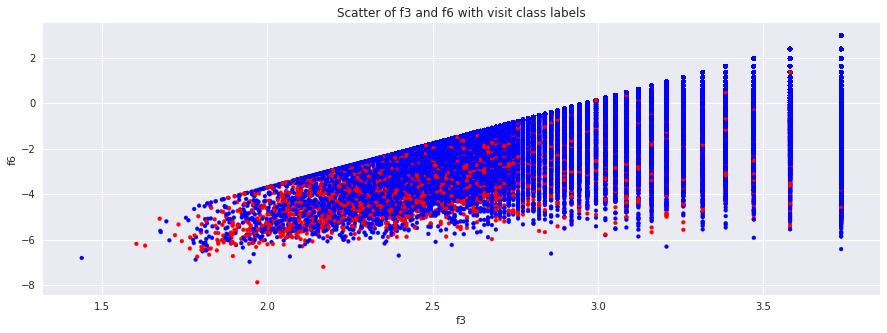

In [95]:
fig, ax = plt.subplots()

colors = {1:'red', 0:'blue'}

ax.scatter(all_df['f3'], all_df['f6'], c=all_df['visit'].apply(lambda x: colors[x]), s=15)
plt.xlabel("f3")
plt.ylabel("f6")
plt.title("Scatter of f3 and f6 with visit class labels")

Text(0.5,1,'Scatter of f3 and f6 with conversion class labels')

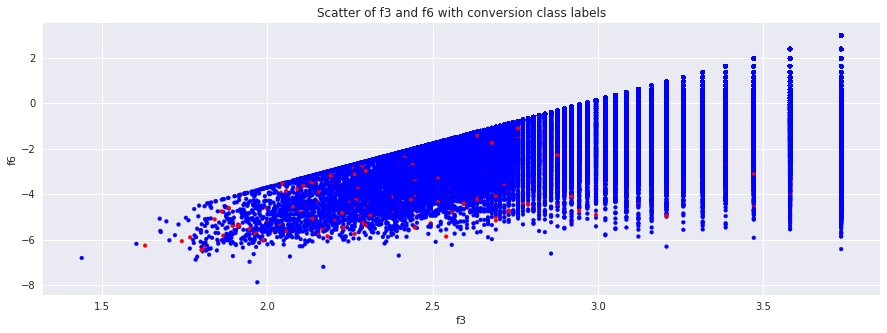

In [86]:
fig, ax = plt.subplots()

colors = {1:'red', 0:'blue'}

ax.scatter(all_df['f3'], all_df['f6'], c=all_df['conversion'].apply(lambda x: colors[x]), s=15)
plt.xlabel("f3")
plt.ylabel("f6")
plt.title("Scatter of f3 and f6 with conversion class labels")

Text(0.5,1,'Scatter of f1 and f5 with visit class labels')

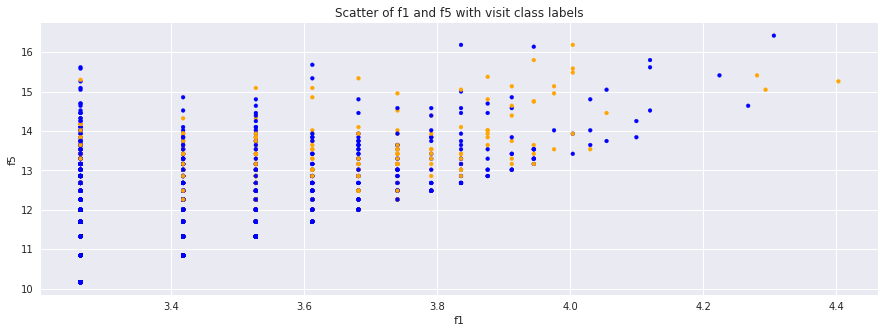

In [87]:
fig, ax = plt.subplots()

colors = {1:'orange', 0:'blue'}

ax.scatter(all_df['f1'], all_df['f5'], c=all_df['visit'].apply(lambda x: colors[x]), s=15)
plt.xlabel("f1")
plt.ylabel("f5")
plt.title("Scatter of f1 and f5 with visit class labels")

Text(0.5,1,'Scatter of f1 and f5 with conversion class labels')

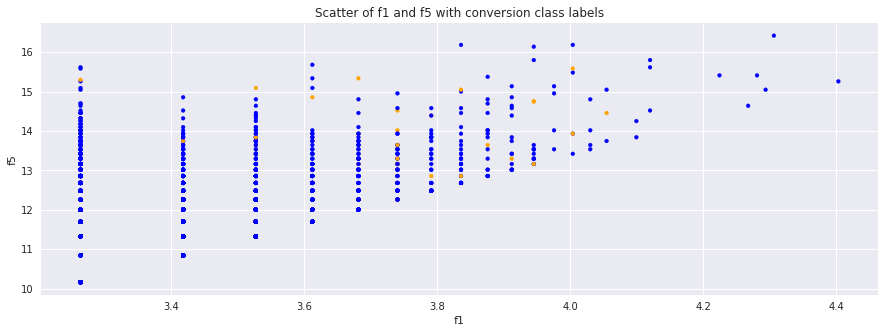

In [88]:
fig, ax = plt.subplots()

colors = {1:'orange', 0:'blue'}

ax.scatter(all_df['f1'], all_df['f5'], c=all_df['conversion'].apply(lambda x: colors[x]), s=15)
plt.xlabel("f1")
plt.ylabel("f5")
plt.title("Scatter of f1 and f5 with conversion class labels")

In [76]:
%%bq query
SELECT DISTINCT f1, count(*) FROM `csc672-capstone.csc672_project.csc672_table`
GROUP BY f1

f1,f0_
4.517222200418558,1
4.373423597838543,5
4.054562543471565,190
4.430583890317188,2
4.637064233706434,1
3.6815011573847802,6491
4.827223998708416,1
4.4393280234148085,3
4.510112590841743,2
4.3522874361337465,8


In [75]:
%%bq query
SELECT DISTINCT f5, count(*) FROM `csc672-capstone.csc672_project.csc672_table`
GROUP BY f5

f5,f0_
15.941299518460262,8
16.382902128231272,2
14.907972158258577,106
16.04443200177358,11
17.57455292470106,1
14.85795728487888,112
13.536996452743548,1670
16.978421611509013,1
15.651723192136826,29
14.698277103356924,149


For features f1 and f5, there are only 61 and 137 distinct values for each feature, respectively. Additionally, for f1, nearly all of the data points are clustered around 8 different distinct values. Similarly,  for f5, nearly all of the data is clustered around 16 distinct values. In each case, I defined data clustering as any distinct value with 1,000 or more instances. 

Text(0.5,1,'Scatter of f5 and f7 with visit class labels')

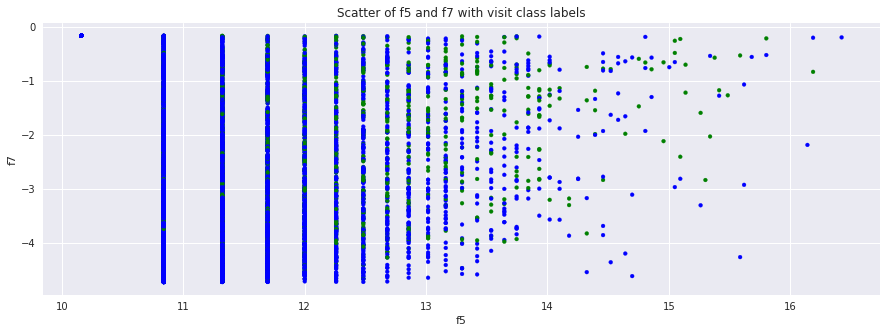

In [89]:
fig, ax = plt.subplots()

colors = {1:'green', 0:'blue'}

ax.scatter(all_df['f5'], all_df['f7'], c=all_df['visit'].apply(lambda x: colors[x]), s=15)
plt.xlabel("f5")
plt.ylabel("f7")
plt.title("Scatter of f5 and f7 with visit class labels")

Text(0.5,1,'Scatter of f5 and f7 with conversion class labels')

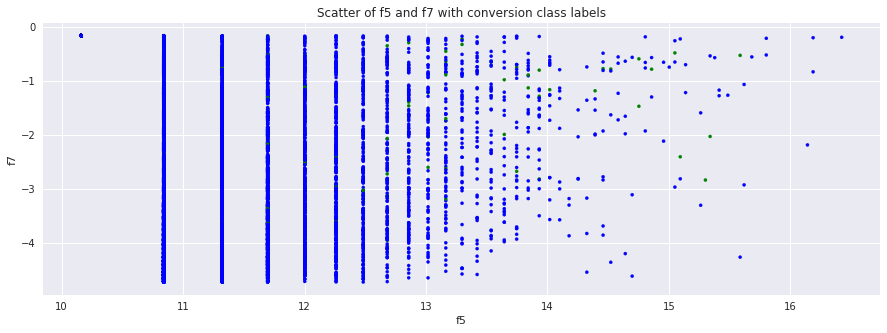

In [80]:
fig, ax = plt.subplots()

colors = {1:'green', 0:'blue'}

ax.scatter(all_df['f5'], all_df['f7'], c=all_df['conversion'].apply(lambda x: colors[x]), s=10)
plt.xlabel("f5")
plt.ylabel("f7")
plt.title("Scatter of f5 and f7 with conversion class labels")

Text(0.5,1,'Scatter of f2 and f9 with visit class labels')

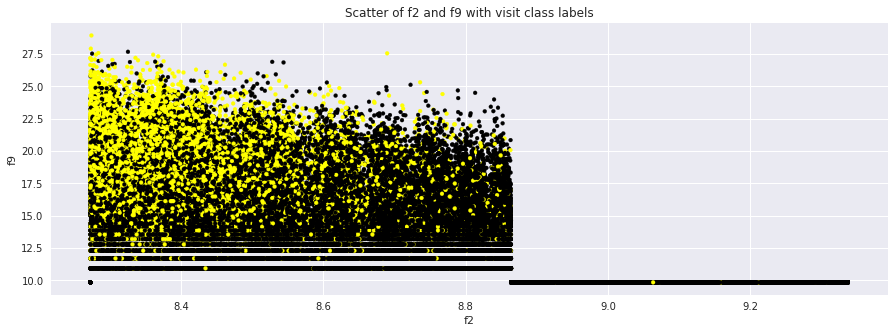

In [90]:
fig, ax = plt.subplots()

colors = {1:'yellow', 0:'black'}

ax.scatter(all_df['f2'], all_df['f9'], c=all_df['visit'].apply(lambda x: colors[x]), s=15)
plt.xlabel("f2")
plt.ylabel("f9")
plt.title("Scatter of f2 and f9 with visit class labels")

Text(0.5,1,'Scatter of f2 and f9 with conversion class labels')

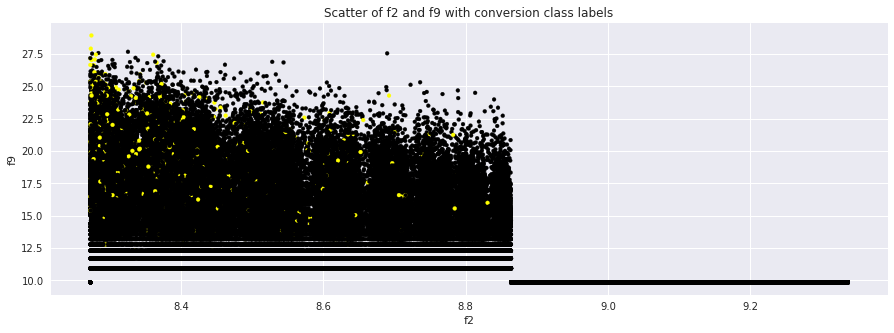

In [91]:
fig, ax = plt.subplots()

colors = {1:'yellow', 0:'black'}

ax.scatter(all_df['f2'], all_df['f9'], c=all_df['conversion'].apply(lambda x: colors[x]), s=15)
plt.xlabel("f2")
plt.ylabel("f9")
plt.title("Scatter of f2 and f9 with conversion class labels")